In [18]:
import pandas as pd
import numpy as np

# 1. Load Datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# 2. Basic Info Print karna (College Requirement)
print("--- IPL Data Overview ---")
print(f"Total Matches Played: {matches.shape[0]}")
print(f"Total Balls Bowled: {deliveries.shape[0]}")
print(f"Total Teams: {matches['team1'].nunique()}")

# 3. Pehla Insight: Total Runs in IPL History
total_runs = deliveries['total_runs'].sum()
print(f"\nIPL History mein bane Total Runs: {total_runs}")

# 4. Check Columns (Taaki humein naam pata chalein)
print("\n--- Match Columns ---")
print(matches.columns.tolist())

--- IPL Data Overview ---
Total Matches Played: 1095
Total Balls Bowled: 260920
Total Teams: 19

IPL History mein bane Total Runs: 347756

--- Match Columns ---
['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']


C:\Users\krish\AppData\Local\Temp\ipykernel_16136\3491571075.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='coolwarm')


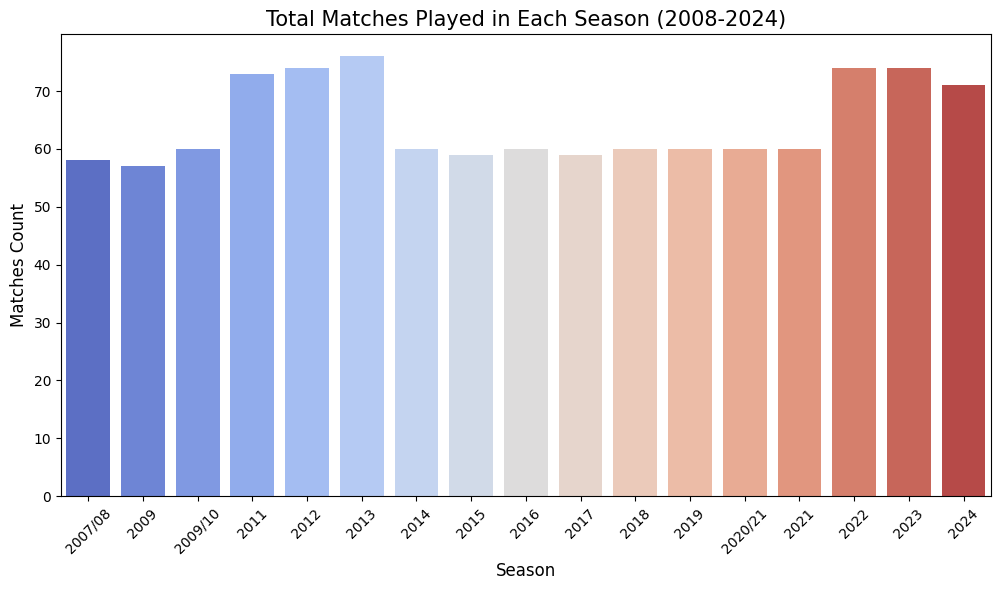

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Analysis (Ginti karna)
matches_per_season = matches['season'].value_counts().sort_index()

# 2. Graph Banana (Visualization)
plt.figure(figsize=(12, 6)) # Graph ka size (Chaudai, Lambai)
sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='coolwarm')

# 3. Sajaavat (Labels & Title)
plt.title('Total Matches Played in Each Season (2008-2024)', fontsize=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Matches Count', fontsize=12)
plt.xticks(rotation=45) # Saalon ke naam tedhe karna taaki overlap na ho
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_16136\3085908725.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=team_wins.index, x=team_wins.values, palette='viridis')


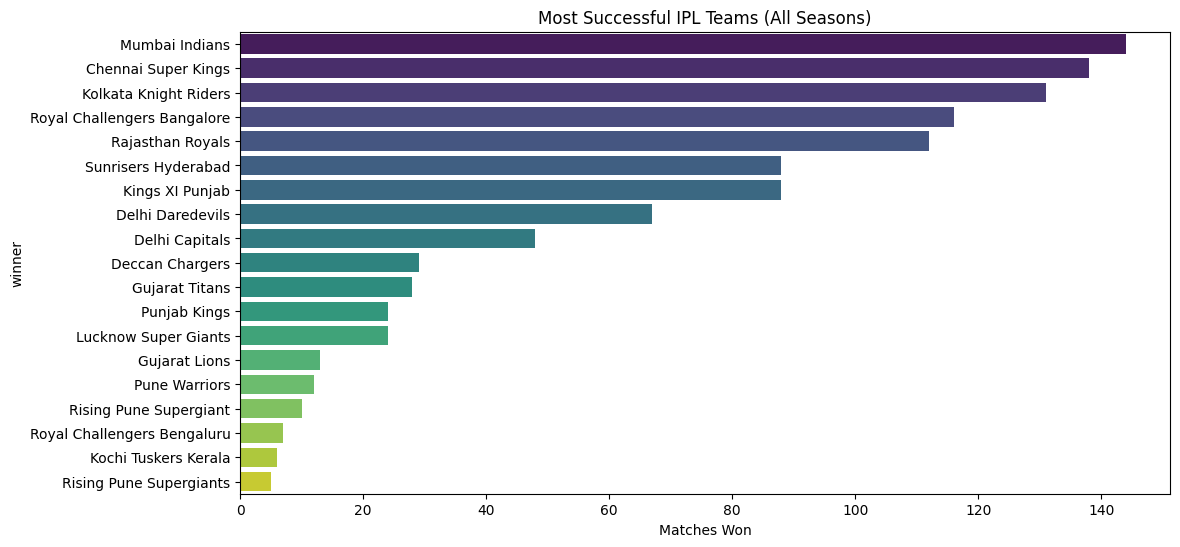

In [20]:
# Task 2: Most Successful Teams (Sabse zyada match kisne jeete?)
# Ginti karna
team_wins = matches['winner'].value_counts()

# Graph Banana
plt.figure(figsize=(12, 6))
# Yahan hum x-axis par Number aur y-axis par Team naam rakhenge (Horizontal Bar Chart)
sns.barplot(y=team_wins.index, x=team_wins.values, palette='viridis')

plt.title('Most Successful IPL Teams (All Seasons)')
plt.xlabel('Matches Won')
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_16136\2017865415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette='summer')


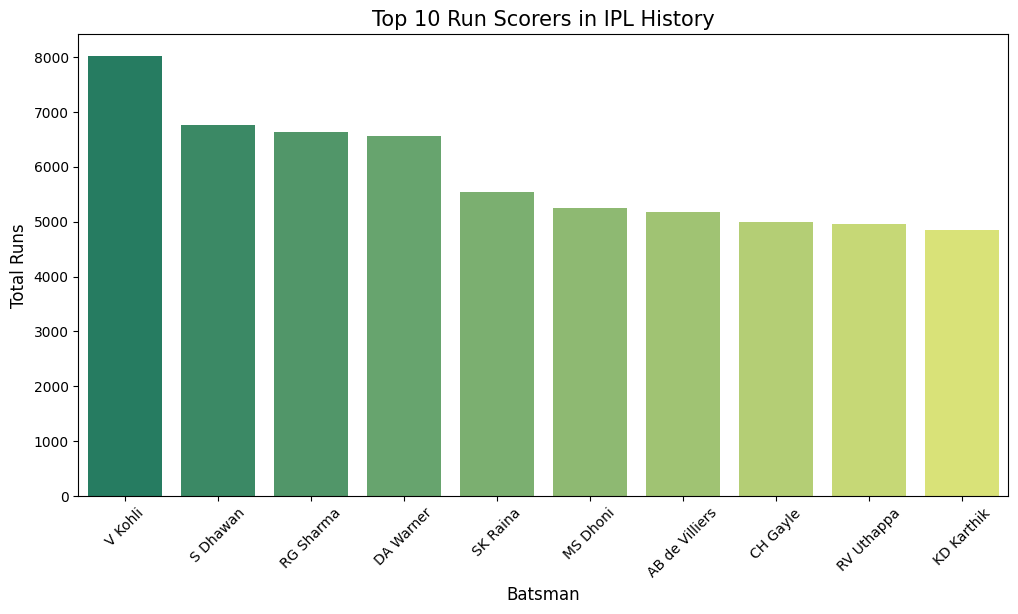

In [21]:
# 1. Group by Batsman and Sum the Runs
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# 2. Graph Banana
plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette='summer')

plt.title('Top 10 Run Scorers in IPL History', fontsize=15)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_16136\4054975145.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette='magma')


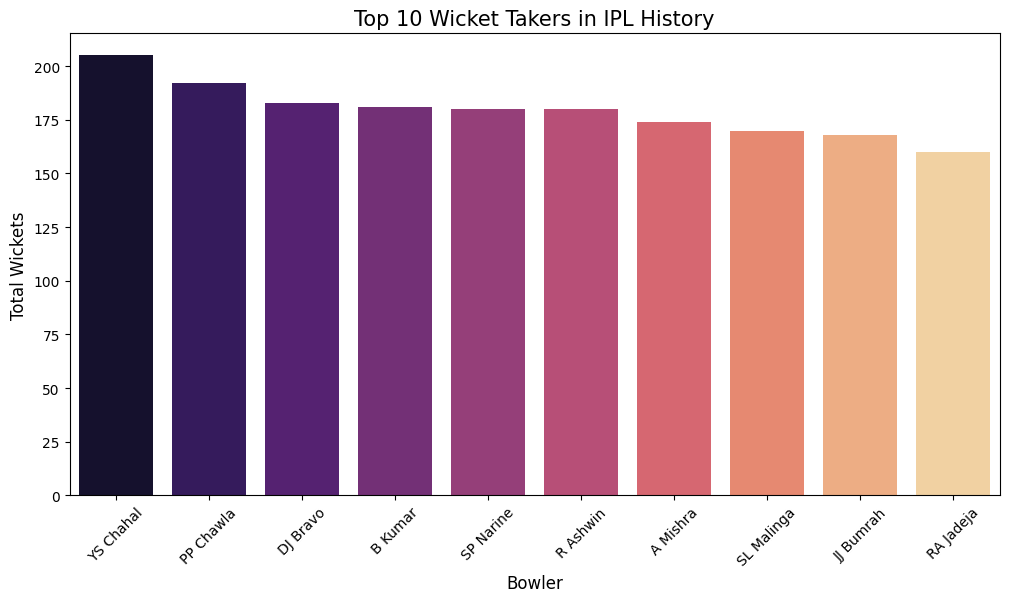

In [22]:
# 1. Sirf wo deliveries jisme out hua ho
dismissal_kinds = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
wickets = deliveries[deliveries['dismissal_kind'].isin(dismissal_kinds)]

# 2. Count Wickets per Bowler
top_bowlers = wickets['bowler'].value_counts().head(10)

# 3. Graph Banana
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette='magma')

plt.title('Top 10 Wicket Takers in IPL History', fontsize=15)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Total Wickets', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [23]:
# 1. Total Score nikalna (Har match ki har innings ka)
total_score_df = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

# 2. Sirf 1st Innings ka score rakhna hai (Target set karne ke liye)
# Hum predict karenge ki "Pehle batting karne wali team kitna banayegi"
total_score_df = total_score_df[total_score_df['inning'] == 1]

# 3. Check karo data kaisa dikh raha hai
print("--- Total Score per Match ---")
print(total_score_df.head())

--- Total Score per Match ---
   match_id  inning  total_runs
0    335982       1         222
2    335983       1         240
4    335984       1         129
6    335985       1         165
8    335986       1         110


In [24]:
# Matches data ke saath jodna
match_df = matches.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')

# Columns check karo
print(match_df['team1'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


In [25]:
# Purane naamo ko Naye naam se badalna
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

# Naam replace karna
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

# Sirf main 8 teams rakhna (Faltu teams hatana jaise Pune Warriors wagera)
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

print("Total Matches after cleaning:", match_df.shape[0])

Total Matches after cleaning: 839


In [26]:
# 1. Sirf wahi matches ka ball-by-ball data lo jo humne clean kiye hain (839 matches)
delivery_df = matches.merge(deliveries, left_on='id', right_on='match_id')

# 2. Sirf Top 8 Teams ka data rakhna hai ball-by-ball mein bhi
delivery_df = delivery_df[delivery_df['team1'].isin(teams)]
delivery_df = delivery_df[delivery_df['team2'].isin(teams)]

# 3. Sirf wahi data rakho jahan ball batting team ki hai
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

# 4. Check karo kitni balls bachi?
print("Total Balls for Analysis:", delivery_df.shape[0])
print(delivery_df.columns)

Total Balls for Analysis: 151731
Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')


In [27]:
# 1. Har match ka Final Score nikalna (Target)
# Hum group karke sum nikal rahe hain
final_scores = delivery_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index().rename(columns={'total_runs':'final_score'})

# 2. Isse wapas apne main data mein jodna
delivery_df = delivery_df.merge(final_scores, on=['match_id', 'inning'])

# 3. Current Score (Live Score) calculate karna
# cumsum() ka matlab Cumulative Sum (Jodte jana: 1.. 5.. 9..)
delivery_df['current_score'] = delivery_df.groupby(['match_id', 'inning'])['total_runs'].cumsum()

# 4. Check karo kya 2 naye columns aaye?
print(delivery_df[['match_id', 'inning', 'current_score', 'final_score']].head())

   match_id  inning  current_score  final_score
0    335982       1              1          222
1    335982       1              1          222
2    335982       1              2          222
3    335982       1              2          222
4    335982       1              2          222
